In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [28]:
mobility_df = pd.read_excel('구글 mobility data.xlsx')
확진자_df = pd.read_excel('확진자 수 데이터.xlsx')



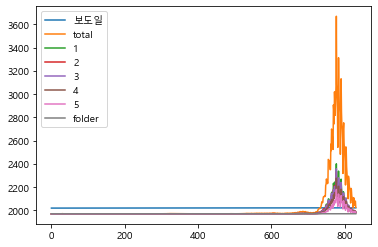

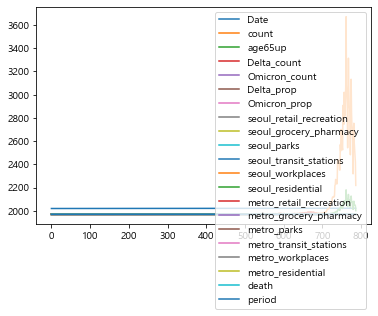

In [29]:
확진자_df.plot()
plt.show()

mobility_df.plot()
plt.show()


In [30]:
mobility_df.drop(['Date', 'age65up', 'Delta_count', 'Omicron_count', 'Delta_prop', 'Omicron_prop', 'death', 'period'],
    axis = 1, inplace = True)

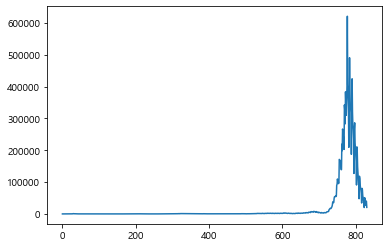

In [31]:
확진자_df_total = 확진자_df.iloc[:, 1]
확진자_df_total.plot()
plt.show()

In [32]:
# 델타 변이 전까지의 시기 라벨링
# 시기를 라벨링하는 기준 정하기
mobility_df


,count,seoul_retail_recreation,seoul_grocery_pharmacy,seoul_parks,seoul_transit_stations,seoul_workplaces,seoul_residential,metro_retail_recreation,metro_grocery_pharmacy,metro_parks,metro_transit_stations,metro_workplaces,metro_residential
0,0,-4,0,3,-6,1,3,-8,0,2,-4,1,3
1,2,-11,0,-31,-15,-3,4,-15,0,-33,-16,-3,4
2,0,-7,-6,-17,-6,0,5,-9,-6,-17,-7,0,5
3,2,-1,-3,-5,-3,2,2,1,-2,-3,-1,2,2
4,34,-5,-1,14,-4,1,2,-7,-1,9,-5,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,224761,-6,8,23,-16,7,1,-15,2,19,-17,3,3
783,205302,-5,14,28,-12,6,1,-13,6,28,-13,1,3
784,185526,0,18,42,-12,-3,2,-10,8,42,-12,-7,2
785,164454,9,14,61,-7,-5,1,0,3,74,-8,-8,0


In [33]:
확진자_df_total = 확진자_df.iloc[16:803,1]

In [34]:
for i in range(len(mobility_df.columns)):
    print(mobility_df.columns[i])
    print(np.corrcoef(mobility_df[mobility_df.columns[i]], 확진자_df_total)[1][0])

count
0.9999999992495252
seoul_retail_recreation
-0.07054604657514998
seoul_grocery_pharmacy
-0.07135513320157794
seoul_parks
-0.1652799187919968
seoul_transit_stations
-0.30969012721611644
seoul_workplaces
0.05762036930415871
seoul_residential
0.09201541515626557
metro_retail_recreation
-0.11165945000535529
metro_grocery_pharmacy
-0.13629137222093754
metro_parks
-0.22048393477668066
metro_transit_stations
-0.2682168315721687
metro_workplaces
0.040616992381649376
metro_residential
0.07533344068454217


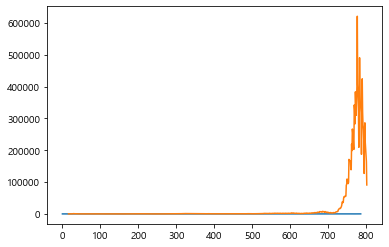

In [35]:
plt.plot(mobility_df[['seoul_parks']])
plt.plot(확진자_df_total)
plt.show()

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
mobility_scaled = scaler.fit_transform(np.array(mobility_df).reshape(-1,1))
affected_scaled = scaler.fit_transform(np.array(확진자_df_total).reshape(-1,1))

In [37]:
mobility_scaled = pd.DataFrame(mobility_scaled.reshape(787, 13), columns = mobility_df.columns)

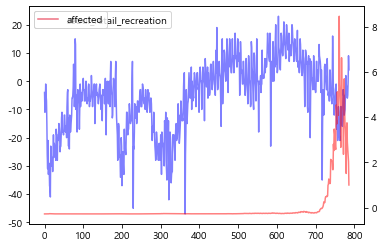

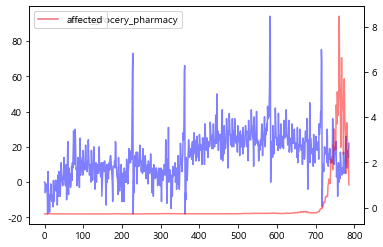

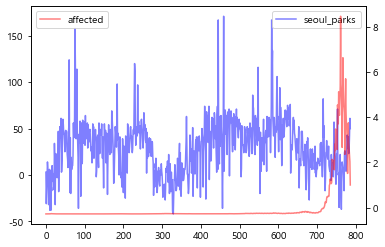

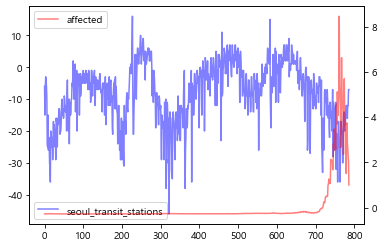

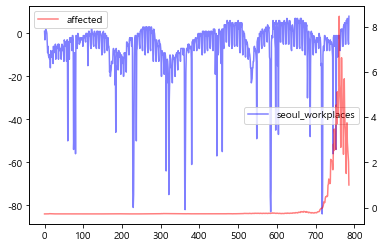

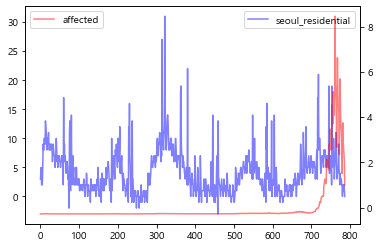

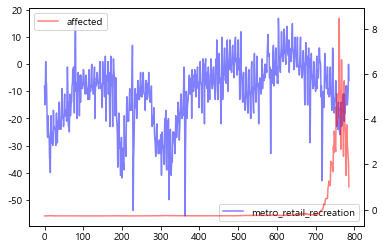

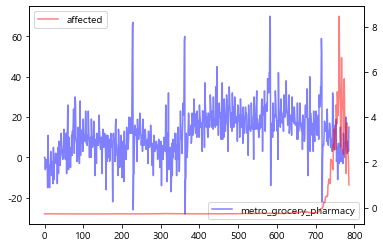

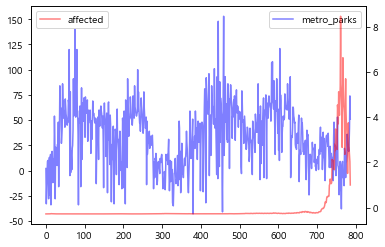

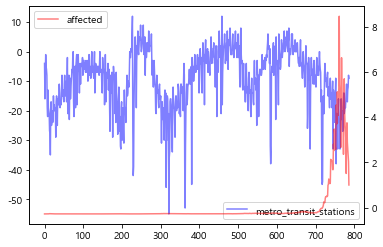

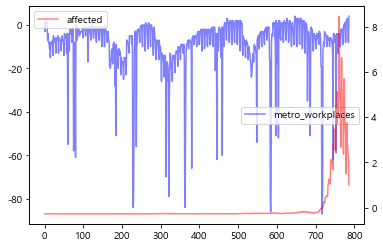

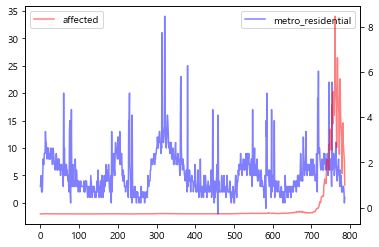

In [38]:
for i in range(1,13):
    fig, ax1 = plt.subplots()
    ax1.plot(mobility_df[[mobility_df.columns[i]]] , label = mobility_df.columns[i], color = 'blue', alpha = 0.5)
    plt.legend()
    ax2 = ax1.twinx()

    ax2.plot(affected_scaled, label = 'affected', color = 'red', alpha = 0.5)

    plt.legend()
    plt.show()

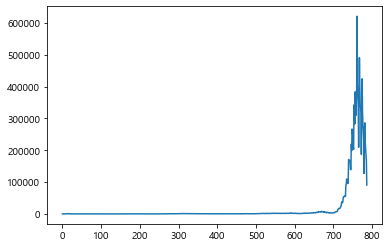

In [39]:
plt.plot(mobility_df['count'])

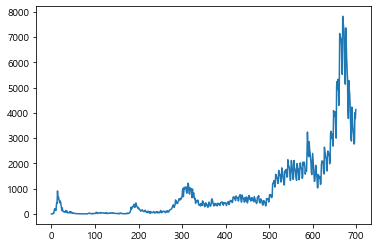

In [40]:
mobility_df = mobility_df.iloc[:700, ]
affected_scaled = pd.DataFrame(affected_scaled).iloc[:700,]
plt.plot(mobility_df['count'])

In [41]:
# 5, 20, 60, 120일 이동평균선 제작하기
af_total = 확진자_df[['total']]
day_5 = []
for i in range(826):
    x = (af_total.iloc[i:i+5,:]).mean()
    day_5.append(x)
day_5_result = []
for i in day_5:
   for x in i:
        day_5_result.append(x)

day_5 = pd.Series(day_5_result, name = 'day_5')
확진자_df = pd.concat([확진자_df,day_5], axis = 1)
확진자_df[['day_5']] = 확진자_df[['day_5']].shift(5)

In [42]:
day_20 = []
for i in range(811):
    x = (af_total.iloc[i:i+20,:]).mean()
    day_20.append(x)

day_20_result = []
for i in day_20:
   for x in i:
        day_20_result.append(x)

day_20 = pd.Series(day_20_result, name = 'day_20')
확진자_df = pd.concat([확진자_df,day_20], axis = 1)
확진자_df[['day_20']] = 확진자_df[['day_20']].shift(20)

day_60 = []
for i in range(771):
    x = (af_total.iloc[i:i+60,:]).mean()
    day_60.append(x)

day_60_result = []
for i in day_60:
   for x in i:
        day_60_result.append(x)

day_60 = pd.Series(day_60_result, name = 'day_60')
확진자_df = pd.concat([확진자_df,day_60], axis = 1)
확진자_df[['day_60']] = 확진자_df[['day_60']].shift(60)

day_120 = []
for i in range(711):
    x = (af_total.iloc[i:i+120,:]).mean()
    day_120.append(x)

day_120_result = []
for i in day_120:
   for x in i:
        day_120_result.append(x)

day_120 = pd.Series(day_120_result, name = 'day_120')
확진자_df = pd.concat([확진자_df,day_120], axis = 1)
확진자_df[['day_120']] = 확진자_df[['day_120']].shift(120)

In [43]:
확진자_df.iloc[:,]

,보도일,total,1,2,3,4,5,file,folder,day_5,day_20,day_60,day_120
0,2020-01-30,1,0,0,0,1,0,20.1~21.10.31,322,NaN,NaN,NaN,NaN
1,2020-01-31,3,0,2,0,1,0,20.1~21.10.31,322,NaN,NaN,NaN,NaN
2,2020-02-01,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
3,2020-02-02,1,0,0,1,0,0,20.1~21.10.31,322,NaN,NaN,NaN,NaN
4,2020-02-03,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,2022-05-05,42268,8316,9771,9269,8267,6645,5.5-5.9,510,40229.8,70824.30,219701.500000,139481.125000
827,2022-05-06,26686,5648,6204,5719,5273,3842,5.5-5.9,510,40030.8,66647.15,216347.083333,139798.100000
828,2022-05-07,39574,7683,8916,8535,8189,6251,5.5-5.9,510,37821.8,62588.15,213281.550000,139987.733333
829,2022-05-08,40048,7875,8680,8483,8237,6773,5.5-5.9,510,41726.4,59918.90,210563.833333,140288.133333


In [44]:
확진자_df = 확진자_df.fillna(0)

In [50]:
확진자_df = 확진자_df.iloc[:700,]

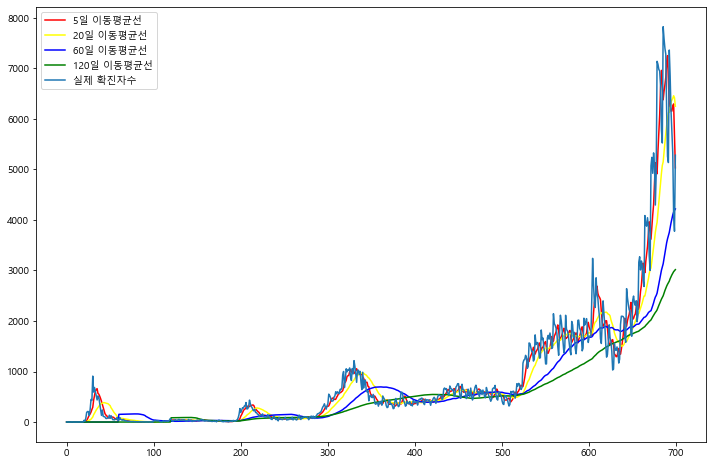

In [51]:
plt.figure(figsize = (12, 8))

plt.plot(확진자_df[['day_5']], color = 'red')
plt.plot(확진자_df[['day_20']], color = 'yellow')
plt.plot(확진자_df[['day_60']], color = 'blue')
plt.plot(확진자_df[['day_120']], color = 'green')
plt.plot(확진자_df[['total']])
plt.legend(['5일 이동평균선', '20일 이동평균선', '60일 이동평균선' ,'120일 이동평균선', '실제 확진자수'])
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'   #한글폰트 깨짐 방지
plt.show()

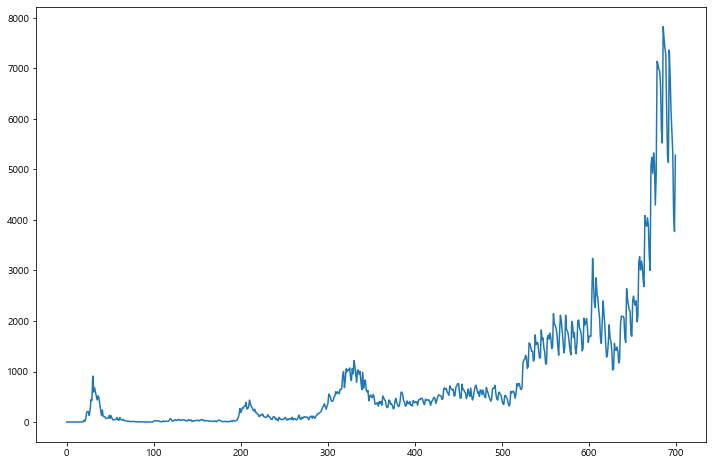

In [52]:
plt.figure(figsize = (12, 8))
plt.plot(확진자_df[['total']])
plt.show()

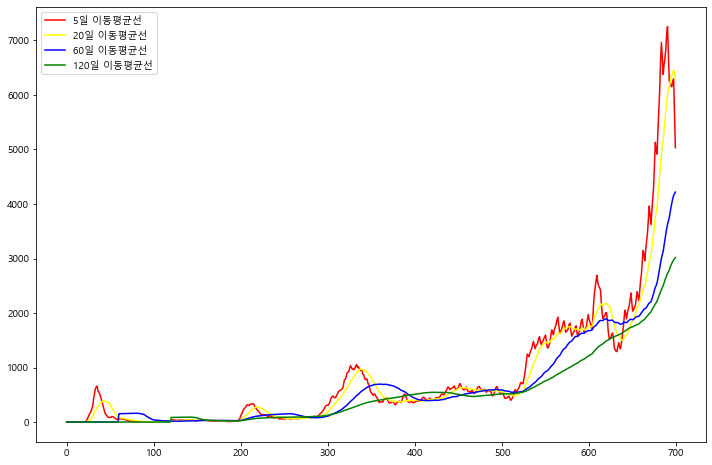

In [53]:
plt.figure(figsize = (12, 8))

plt.plot(확진자_df[['day_5']], color = 'red')
plt.plot(확진자_df[['day_20']], color = 'yellow')
plt.plot(확진자_df[['day_60']], color = 'blue')
plt.plot(확진자_df[['day_120']], color = 'green')

plt.legend(['5일 이동평균선', '20일 이동평균선', '60일 이동평균선' ,'120일 이동평균선'])
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'   #한글폰트 깨짐 방지
plt.show()